# scikit-learn

unbelievably cool

but first
let's take a glance at ipython notebook

# ipython notebook

installation
```
$ pip install ipython[notebook] matplotlib
```

start it up

```
$ ipython notebook
```

## live demo now

just basic editing

## don't forget about slideshows

live demo of marking it up for slide show

convert and open it in a browser

```
$ ipython nbconvert slideshow.ipynb --to slides --post serve
```

## nbviewer and github

both here in this url


http://nbviewer.ipython.org/github/pjpmarques/Julia-Modeling-the-World/blob/master/Three-Body%20Problem.ipynb

# machine learning

          
          

## model overfitting

## polynomial overfitting

![overfitting](http://i.stack.imgur.com/t0zit.png)

## clustering overfitting


![overfitting](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/480px-Overfitting.svg.png)

## bias vs variance

![bias vs variance](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

## let's play with iris dataset

![iris illustration](http://nbviewer.ipython.org/github/justmarkham/scikit-learn-videos/blob/master/images/03_iris.png)

In [29]:
print iris.feature_names
print iris.data[0:5]
print iris.data[60:65]
print iris.data[100:105]
print iris.target
print iris.target_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[[ 5.   2.   3.5  1. ]
 [ 5.9  3.   4.2  1.5]
 [ 6.   2.2  4.   1. ]
 [ 6.1  2.9  4.7  1.4]
 [ 5.6  2.9  3.6  1.3]]
[[ 6.3  3.3  6.   2.5]
 [ 5.8  2.7  5.1  1.9]
 [ 7.1  3.   5.9  2.1]
 [ 6.3  2.9  5.6  1.8]
 [ 6.5  3.   5.8  2.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [106]:
from sklearn.datasets import load_iris
iris = load_iris()

# print iris.data.shape
# print iris.target.shape

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(iris.data, iris.target)

prrr = [[3, 5, 4, 2], [5, 4, 3, 2]]
print knn.predict(prrr)

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(iris.data, iris.target)
print knn5.predict(prrr)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(iris.data, iris.target)
print logreg.predict(prrr)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(iris.data, iris.target)
print dtc.predict(prrr)

[2 1]
[1 1]
[2 0]
[1 1]


In [107]:
print logreg.predict_proba(prrr)
print dtc.predict_proba(prrr)

[[ 0.11183585  0.00264262  0.88552152]
 [ 0.87855906  0.03542857  0.08601237]]
[[ 0.  1.  0.]
 [ 0.  1.  0.]]


In [42]:
from sklearn import metrics
print metrics.accuracy_score(iris.target, logreg.predict(iris.data))
print metrics.accuracy_score(iris.target, knn.predict(iris.data))

0.96
1.0


## remember overfitting?

![overfitting](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/480px-Overfitting.svg.png)

## split data

In [59]:
from sklearn.cross_validation import train_test_split
X_train, X_test, \
y_train, y_test = \
    train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape



(90, 4)
(60, 4)
(90,)
(60,)


In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.91666666666666663

## pros and cons of simple splitting

discussion

# cross-validation

we now tried train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

next step is KFold(len(iris.data), n_folds=5)

but not right now

## example: best K for K neighbors

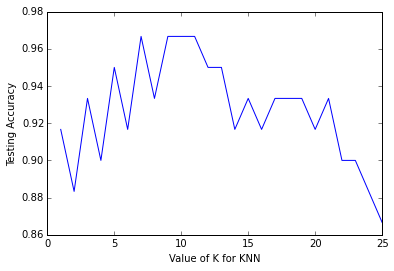

In [71]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## now let's draw the decision tree

easily done with     
tree.export_graphviz(dtc, out_file)

and then    
$ dot -Tpng tree.dot -o tree.png



In [83]:
from sklearn.externals.six import StringIO
from subprocess import call

with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file=f)
    
call(["dot", "-Tpng", "iris.dot", "-o", "iris.png"])

0

![decision tree classifier for iris dataset](iris.png)

# Bayes' theorem

$$\Pr( \ A \ | \ B \ ) = \frac{\Pr( \ B \ | \ A \ ) \Pr(A)}{\Pr(B)}$$

$$\Pr( \ S \ | \ W_1 \ldots W_n \ ) = \frac{\Pr( \ W_1 \ldots W_n \ | \ S \ ) \Pr(S)}{\Pr(W_1 \ldots W_n)}$$

$$\Pr( \ W_1 \ldots W_n \ | \ S \ ) = \Pr( \ W_1 \ | \ S \ ) \ldots \Pr( \ W_n \ | \ S \ )$$


vocabulary = [a, the, fuck, suck, hello, ...]    
[0, 0, 1, 1, 0, ...]

[5, 3, 4, 5, ...]


## Thomas Bayes

![Thomas Bayes](https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif)

## naive bayes and multinomial bayes

same theorem, different rules, estimations, and results

## multinomial bayes estimates quality of cars



In [100]:
# thinkModelCode_carData.py

from sklearn.preprocessing import LabelBinarizer
from sklearn import naive_bayes
import numpy as np
import csv
import random
import urllib

# Read in data from UCI Machine Learning Repository URL:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
webpage = urllib.urlopen(url)
datareader = csv.reader(webpage)
ct = 0;
for row in datareader:
 ct = ct+1
webpage = urllib.urlopen(url) 
datareader = csv.reader(webpage)
data = np.array(-1*np.ones((ct,7),float),object);
k=0;
for row in datareader:
 data[k,:] = np.array(row)
 k = k+1;
    
print data[50:60]

featnames = np.array(['buyPrice','maintPrice','numDoors','numPersons','lugBoot','safety'],str)

keys = [[]]*np.size(data,1)
numdata = -1*np.ones_like(data);

# convert string objects to integer values for modeling:
for k in range(np.size(data,1)):
 keys[k],garbage,numdata[:,k] = np.unique(data[:,k],True,True)

numrows = np.size(numdata,0); # number of instances in car data set
numcols = np.size(numdata,1); # number of columns in car data set
numdata = np.array(numdata,int)
xdata = numdata[:,:-1]; # x-data is all data BUT the last column which are the class labels
ydata = numdata[:,-1]; # y-data is set to class labels in the final column, signified by -1

[['vhigh' 'vhigh' '3' 'more' 'med' 'high' 'unacc']
 ['vhigh' 'vhigh' '3' 'more' 'big' 'low' 'unacc']
 ['vhigh' 'vhigh' '3' 'more' 'big' 'med' 'unacc']
 ['vhigh' 'vhigh' '3' 'more' 'big' 'high' 'unacc']
 ['vhigh' 'vhigh' '4' '2' 'small' 'low' 'unacc']
 ['vhigh' 'vhigh' '4' '2' 'small' 'med' 'unacc']
 ['vhigh' 'vhigh' '4' '2' 'small' 'high' 'unacc']
 ['vhigh' 'vhigh' '4' '2' 'med' 'low' 'unacc']
 ['vhigh' 'vhigh' '4' '2' 'med' 'med' 'unacc']
 ['vhigh' 'vhigh' '4' '2' 'med' 'high' 'unacc']]


$$\Pr( \ A \ | \ B \ ) = \frac{\Pr( \ B \ | \ A \ ) \Pr(A)}{\Pr(B)}$$

$$\Pr( \ S \ | \ W_1 \ldots W_n \ ) = \frac{\Pr( \ W_1 \ldots W_n \ | \ S \ ) \Pr(S)}{\Pr(W_1 \ldots W_n)}$$

$$\Pr( \ W_1 \ldots W_n \ | \ S \ ) = \Pr( \ W_1 \ | \ S \ ) \ldots \Pr( \ W_n \ | \ S \ )$$

## notice the LabelBinarizer here -- preprocessing here

In [84]:
# ------------------ numdata multilabel -> binary conversion for NB-Model ---------------------
lbin = LabelBinarizer();
for k in range(np.size(xdata,1)): # loop thru number of columns in xdata
 if k==0:
  xdata_ml = lbin.fit_transform(xdata[:,k]);
 else:
  xdata_ml = np.hstack((xdata_ml,lbin.fit_transform(xdata[:,k])))
ydata_ml = lbin.fit_transform(ydata)


# -------------------------- Data Partitioning and Cross-Validation --------------------------
# As suggested by the UCI machine learning repository, do a 2/3 train, 1/3 test split
allIDX = np.arange(numrows);
random.shuffle(allIDX); # randomly shuffles allIDX order for creating 'holdout' sample
holdout_number = numrows/10; # holdout 10% of full sample set to perform validation
testIDX = allIDX[0:holdout_number];
trainIDX = allIDX[holdout_number:];

# create training and test data sets
xtest = xdata_ml[testIDX,:];
xtrain = xdata_ml[trainIDX,:];
ytest = ydata[testIDX];
ytrain = ydata[trainIDX];

# ------------------------------ Naive_Bayes Model Construction ------------------------------
# ------------------------------  MultinomialNB & ComplementNB  ------------------------------
mnb = naive_bayes.MultinomialNB();
mnb.fit(xtrain,ytrain);
print "Classification accuracy of MNB = ", mnb.score(xtest,ytest)


Classification accuracy of MNB =  0.854651162791


In [96]:
print xtest[50:60]

[[0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0]
 [1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1]
 [0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0]
 [0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0]
 [0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1]]


In [99]:
print mnb.predict([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

[2]


## my questions

- log-loss widely used by Kaggle for cross-validation:
https://www.kaggle.com/wiki/GettingStartedWithPythonForDataScience

$${\cal L}(y,\hat{y}) = - \sum_{n=1}^N  y_n \log \hat{y}_n + (1-y_n) \log (1 - \hat{y}_n)$$

- logistic regression vs naive bayes: http://www.cs.cmu.edu/~epxing/Class/10701-10s/Lecture/lecture5.pdf#11

$$F(x) = \frac {1}{1+e^{-(\beta_0 + \beta_1 x)}}$$

# sources

http://www.dataschool.io/machine-learning-with-scikit-learn/

http://thinkmodelcode.blogspot.ru/2013/04/naive-bayes-classification-using-python.html

http://blog.datumbox.com/machine-learning-tutorial-the-naive-bayes-text-classifier/